# 处理极值

In [1]:
import arcpy
from arcpy import env
from arcpy.sa import *

In [2]:
# 处理缺失值
# 设置环境
env.workspace = r"C:\Users\Runker\Desktop\test"  # 更改为您的工作区路径
inRaster = r"C:\Users\Runker\Desktop\test\ky5.tif"  # 输入栅格文件

In [2]:
# 处理缺失值
# 设置环境
env.workspace = r"D:\ArcGISProjects\workspace\shbyq\feature_raster_file\features_data_ky.gdb"  # 更改为您的工作区路径


In [16]:
raster_list = arcpy.ListRasters()

In [13]:
inRaster = 'ClosedDepressions'

In [14]:

# 设置异常值阈值
lowerThreshold = 0  # 根据您的数据设置下限阈值
upperThreshold = 4000  # 根据您的数据设置上限阈值

# 识别异常值
outCon1 = Con((Raster(inRaster) <= lowerThreshold) | (Raster(inRaster) >= upperThreshold), 1, 0)

# 使用焦点统计来处理异常值
neighborhood = NbrCircle(3, "CELL")  # 设置邻域大小和形状
outFocalStat = FocalStatistics(inRaster, neighborhood, "MEAN")
# outFocalStat = FocalStatistics(in_raster=inRaster, neighborhood=neighborhood, statistics_type="MEAN",ignore_nodata="NODATA")

# 替换异常值
outRaster = Con(outCon1 == 1, 666, inRaster)

# 保存结果
outRaster.save("ky5123.tif")

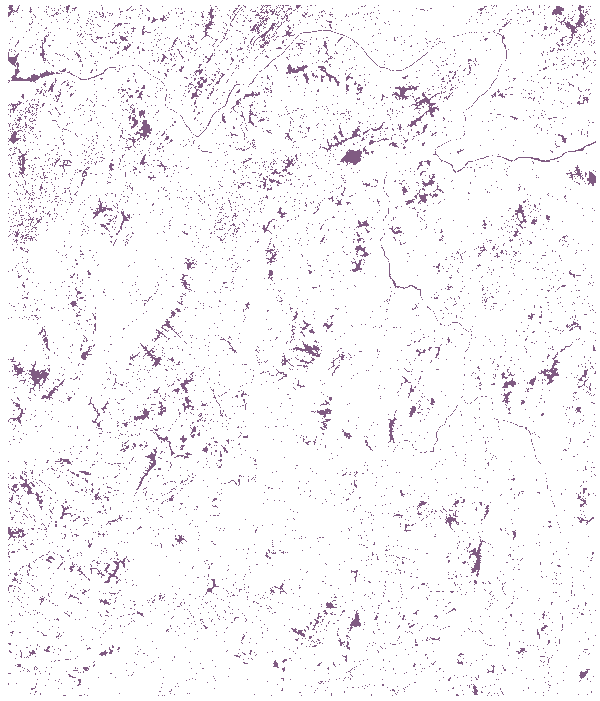

In [15]:
outCon1

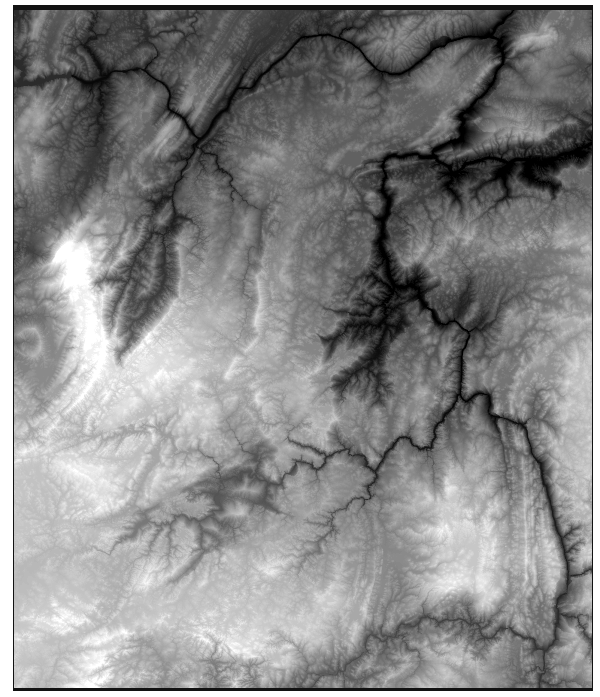

In [10]:
outRaster